In [1]:
import re
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parseLogFile(filename, variable_count):
    with open(filename, 'r') as f:
        log_content = (f.read())

    regex = r"([0-9.\+]+)s (.+:) " + ', '.join([r"([\w]+=[0-9.\-\+]+)[\w]+"] * variable_count)
    subst = "time=\\1,\\" + ",\\".join([str(x) for x in list(range(3, 3 + variable_count))])

    result = re.sub(regex, subst, log_content, 0, re.MULTILINE)

    if result:
        result = result.replace('+', '')\
                       .replace('=', '":')\
                       .replace(',', ',"')\
                       .replace('\n', '},\n{"')
        result = '[{"' + result
        result = result[:-4] + ']'
        return ast.literal_eval(result)

## Kunisch Rural

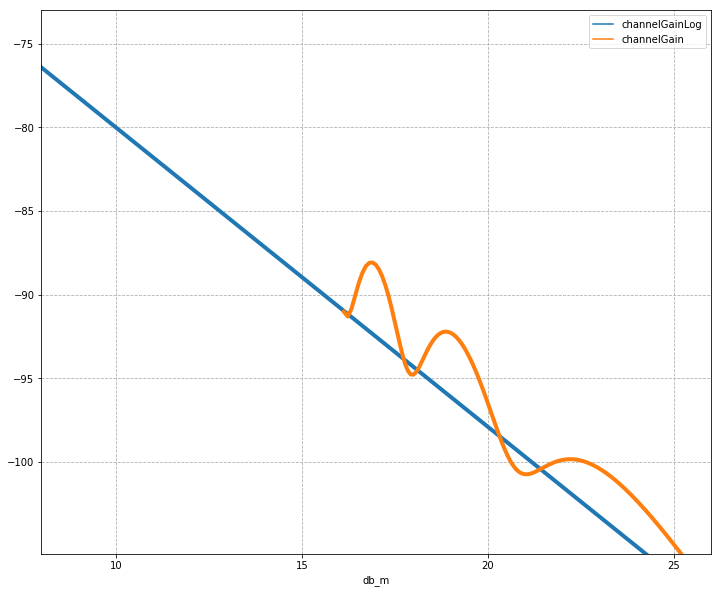

In [114]:
df = pd.DataFrame(parseLogFile('output/kunisch_rural.log', 4))
df['channelGain'] = df['rxPower'] - df['txPower']
df['db_m'] = 10 * np.log10(df['distance'])

df['channelGainLog'] = -62.1 + 10 * (-1.79) * np.log10(df['distance'])

df['channelGain'] = df['channelGain'] + 1.1

# ax = df.query('distance >= 33 and distance <= 400')\
#        .plot(x='distance', y='channelGain', logx=True,
#              yticks=[-75, -80, -85, -90, -95, -100],
#              xticks=[10, 32, 100, 316],
#              figsize=(12, 10))

ax = df.query('distance >= 5 and distance <= 400')\
       .plot(x='db_m', y='channelGainLog',
             yticks=[-75, -80, -85, -90, -95, -100],
             xticks=[10, 15, 20, 25],
             figsize=(12, 10))

ax = df.query('distance >= 41 and distance <= 400')\
       .plot(x='db_m', y='channelGain',
             yticks=[-75, -80, -85, -90, -95, -100],
             xticks=[10, 15, 20, 25],
             xlim=[8, 26],
             ylim=[-105.5, -73],
             figsize=(12, 10),
             ax=ax)


ax.grid(True,which="both",ls="--")
for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=4)

## Kunisch Highway

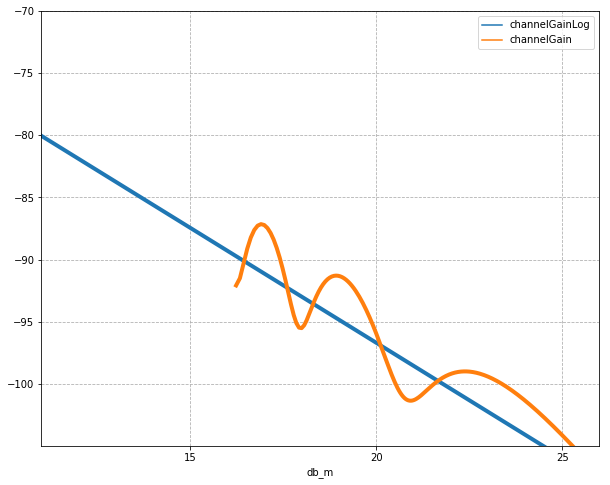

In [105]:
df = pd.DataFrame(parseLogFile('output/kunisch_highway.log', 4))
df['channelGain'] = df['rxPower'] - df['txPower']
df['db_m'] = 10 * np.log10(df['distance'])

df['channelGainLog'] = -59.7 + 10 * (-1.85) * np.log10(df['distance'])

df['channelGain'] = df['channelGain'] + 1

# ax = df.query('distance >= 33 and distance <= 400')\
#        .plot(x='distance', y='channelGain', logx=True,
#              yticks=[-75, -80, -85, -90, -95, -100],
#              xticks=[10, 32, 100, 316],
#              figsize=(12, 10))

ax = df.query('distance >= 12 and distance <= 400')\
       .plot(x='db_m', y='channelGainLog',
             yticks=[-75, -80, -85, -90, -95, -100],
             xticks=[10, 15, 20, 25],
             figsize=(12, 10))

ax = df.query('distance >= 41.1 and distance <= 400')\
       .plot(x='db_m', y='channelGain',
             yticks=[-70, -75, -80, -85, -90, -95, -100],
             xticks=[15, 20, 25],
             xlim=[11, 26],
             ylim=[-105, -70],
             figsize=(10, 8),
             ax=ax)


ax.grid(True,which="both",ls="--")
for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=4)

## Kunisch Urban

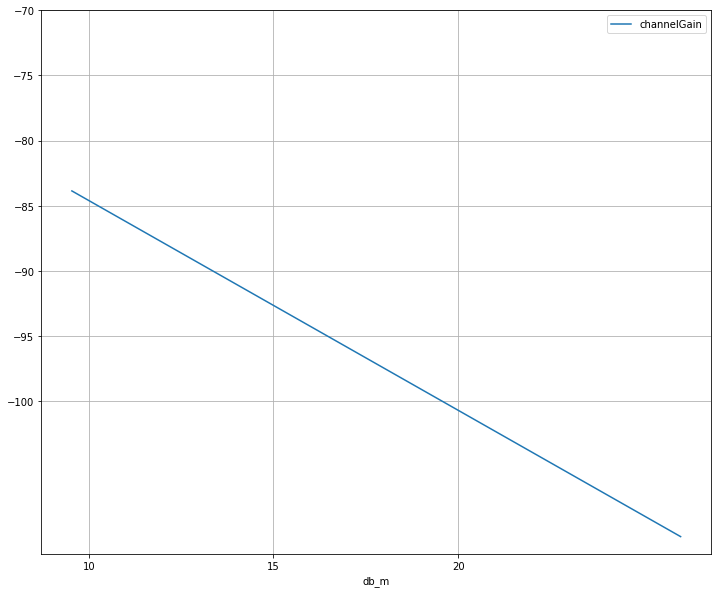

In [38]:
df = pd.DataFrame(parseLogFile('kunisch_urban.log', 4))
df['channelGain'] = df['rxPower'] - df['txPower']
df['db_m'] = 10 * np.log10(df['distance'])
df.query('distance >= 9 and distance <= 400')\
  .plot(x='db_m', y='channelGain', grid=True,
        yticks=[-70, -75, -80, -85, -90, -95, -100],
        xticks=[10, 15, 20],
        figsize=(12, 10))

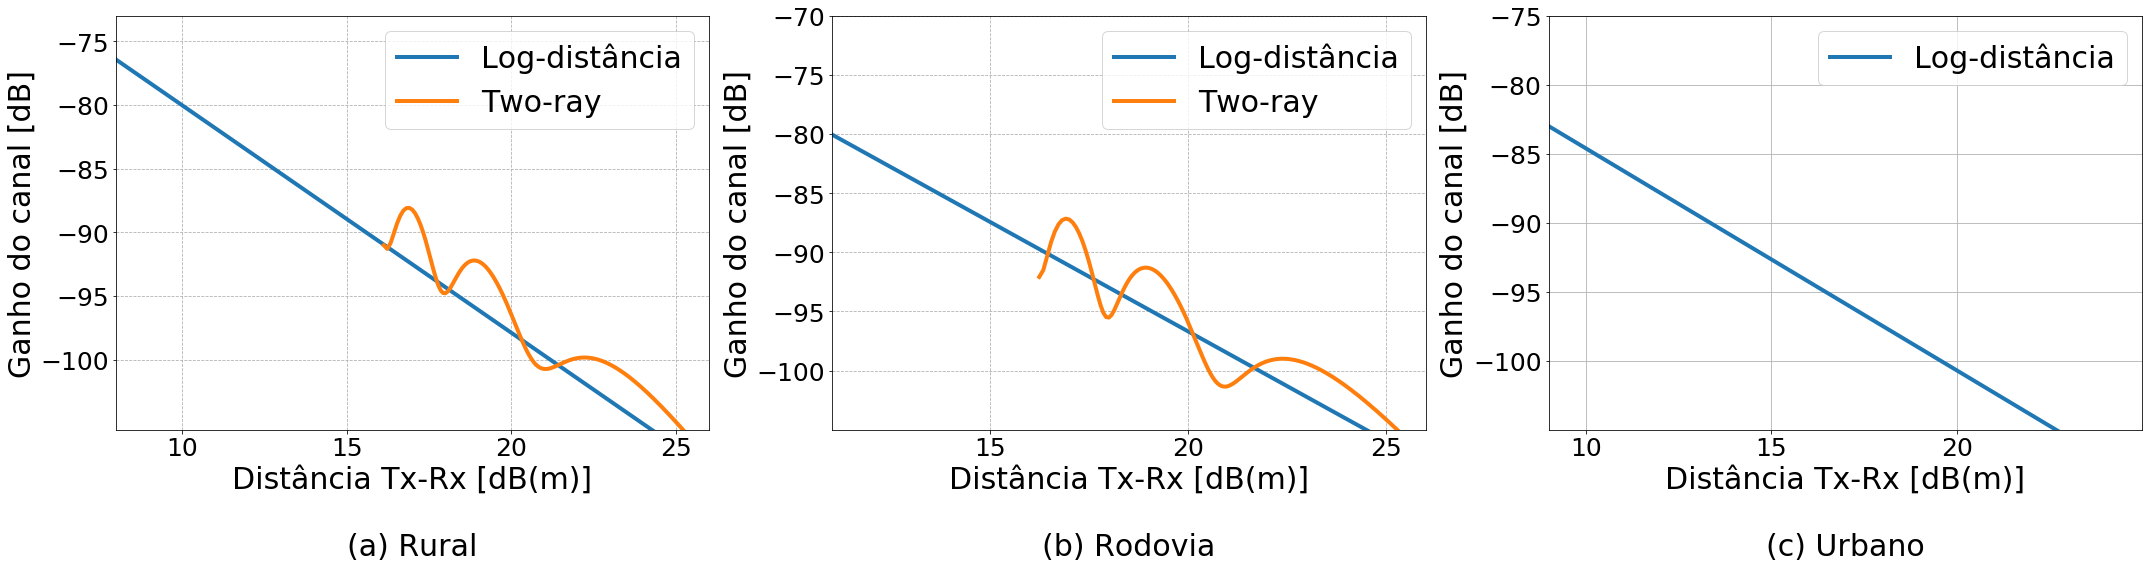

In [167]:
fontsize=25

fig, axes = plt.subplots(1, 3, figsize=(30, 8))
for i in range(len(axes)):
    ax = axes[i]
    if i == 0:       
        df = pd.DataFrame(parseLogFile('output/kunisch_rural.log', 4))
        df['channelGain'] = df['rxPower'] - df['txPower']
        df['db_m'] = 10 * np.log10(df['distance'])

        df['channelGainLog'] = -62.1 + 10 * (-1.79) * np.log10(df['distance'])

        df['channelGain'] = df['channelGain'] + 1.1

        df.query('distance >= 5 and distance <= 400')\
               .plot(x='db_m', y='channelGainLog',
                     yticks=[-75, -80, -85, -90, -95, -100],
                     xticks=[10, 15, 20, 25],
                     fontsize=fontsize,
                     ax=ax)

        ax = df.query('distance >= 41 and distance <= 400')\
               .plot(x='db_m', y='channelGain',
                     yticks=[-75, -80, -85, -90, -95, -100],
                     xticks=[10, 15, 20, 25],
                     xlim=[8, 26],
                     ylim=[-105.5, -73],
                     fontsize=fontsize,
                     ax=ax)

        ax.set_xlabel('Distância Tx-Rx [dB(m)]\n\n(a) Rural', fontsize=30)
        ax.grid(True,which="both",ls="--")
        for i, l in enumerate(ax.lines):
            plt.setp(l, linewidth=4)
    
    elif i == 1:
        df = pd.DataFrame(parseLogFile('output/kunisch_highway.log', 4))
        df['channelGain'] = df['rxPower'] - df['txPower']
        df['db_m'] = 10 * np.log10(df['distance'])

        df['channelGainLog'] = -59.7 + 10 * (-1.85) * np.log10(df['distance'])

        df['channelGain'] = df['channelGain'] + 1

        df.query('distance >= 12 and distance <= 400')\
               .plot(x='db_m', y='channelGainLog',
                     yticks=[-75, -80, -85, -90, -95, -100],
                     xticks=[10, 15, 20, 25],
                     fontsize=fontsize,
                     ax=ax)

        df.query('distance >= 41.1 and distance <= 400')\
               .plot(x='db_m', y='channelGain',
                     yticks=[-70, -75, -80, -85, -90, -95, -100],
                     xticks=[15, 20, 25],
                     xlim=[11, 26],
                     ylim=[-105, -70],
                     fontsize=fontsize,
                     ax=ax)

        ax.set_xlabel('Distância Tx-Rx [dB(m)]\n\n(b) Rodovia', fontsize=30)
        ax.grid(True,which="both",ls="--")
        for i, l in enumerate(ax.lines):
            plt.setp(l, linewidth=4)
    else:
        df = pd.DataFrame(parseLogFile('output/kunisch_urban.log', 4))
        df['channelGain'] = df['rxPower'] - df['txPower']
        df['db_m'] = 10 * np.log10(df['distance'])
        df.query('distance >= 5 and distance <= 400')\
          .plot(x='db_m', y='channelGain', grid=True,
                yticks=[-70, -75, -80, -85, -90, -95, -100],
                xticks=[10, 15, 20],
                xlim=[9, 25],
                ylim=[-105, -75],
                fontsize=fontsize,
                ax=ax)
        for i, l in enumerate(ax.lines):
            plt.setp(l, linewidth=4)
    
        ax.set_xlabel('Distância Tx-Rx [dB(m)]\n\n(c) Urbano', fontsize=30)
    
    ax.set_ylabel('Ganho do canal [dB]', fontsize=30)
    ax.legend(['Log-distância', 'Two-ray'], fontsize=30)

fig.tight_layout()
plt.savefig('test.eps')

### Karedal

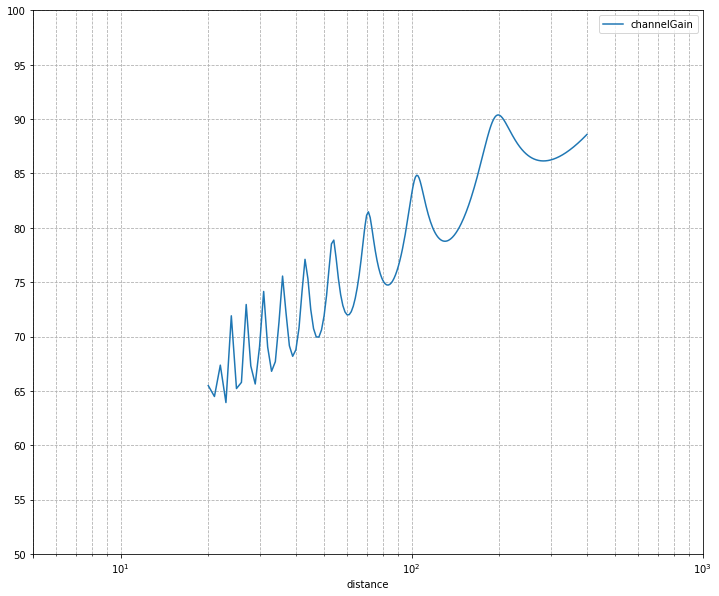

In [43]:
df = pd.DataFrame(parseLogFile('output/teste_karedal.log', 4))
df['channelGain'] = -(df['rxPower'] - df['txPower'])
df['db_m'] = 10 * np.log10(df['distance'])
ax = df.query('distance >= 20 and distance <= 400')\
       .plot(x='distance', y='channelGain', logx=True,
             yticks=list(range(100, 45, -5)),
             xticks=[5, 10, 100, 1000],
             figsize=(12, 10))
ax.grid(True,which="both",ls="--")

## Dual-log

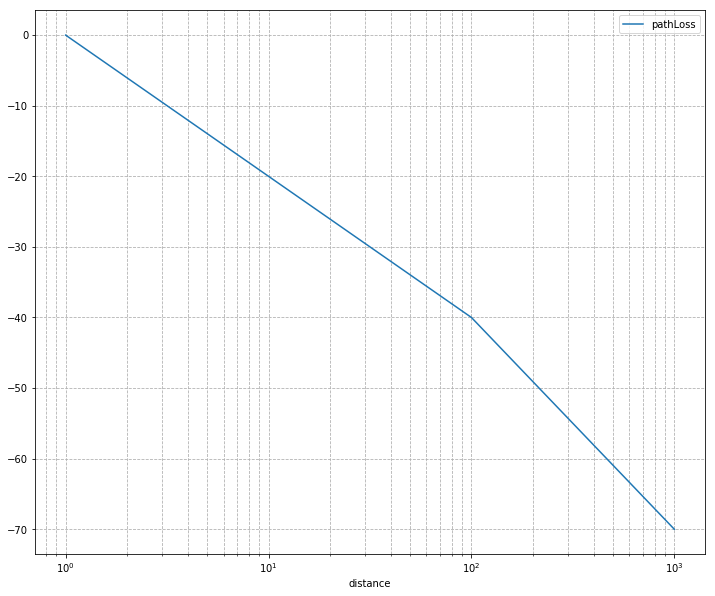

In [6]:
df = pd.DataFrame(parseLogFile('output/dual_log_debug.log', 4))
df['pathLoss'] = (df['rxPower'] - df['txPower'])
df['db_m'] = 10 * np.log10(df['distance'])
ax = df.plot(x='distance', y='pathLoss', logx=True,
             figsize=(12, 10))
ax.grid(True,which="both",ls="--")

## Abbas - Highway LOS

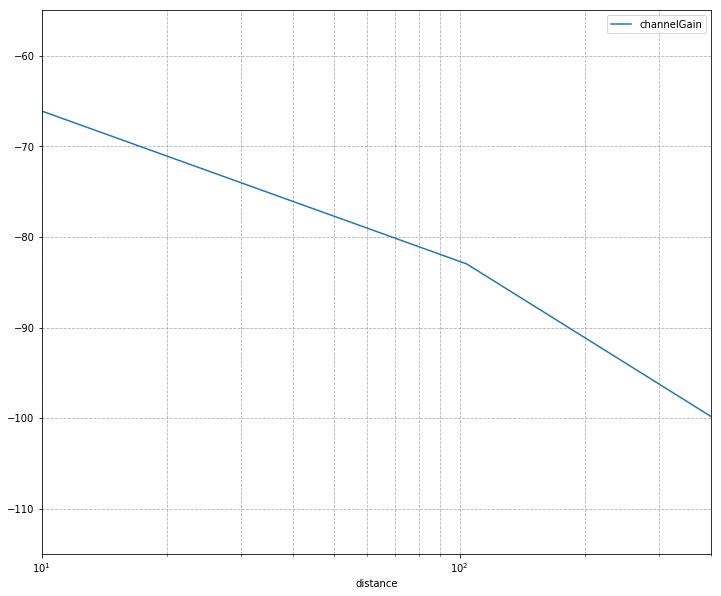

In [12]:
df = pd.DataFrame(parseLogFile('output/abbas_highway_los.log', 4))
df['channelGain'] = (df['rxPower'] - df['txPower'])
df['db_m'] = 10 * np.log10(df['distance'])
ax = df.query('distance >= 10')\
       .plot(x='distance', y='channelGain', logx=True,
             yticks=[-60, -70, -80, -90, -100, -110],
             xticks=[10, 100],
             xlim=[10, 400],
             ylim=[-115, -55],
             figsize=(12, 10))
ax.grid(True,which="both",ls="--")

## Abbas - Urban LOS e OLOS

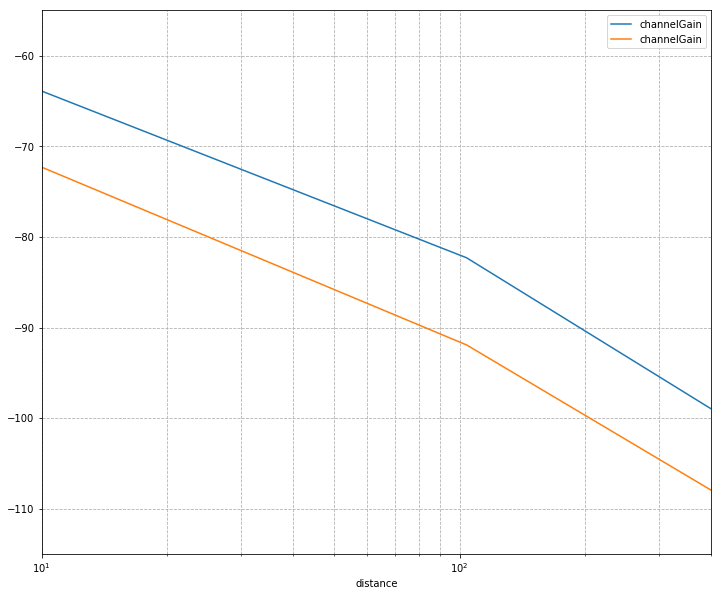

In [13]:
df = pd.DataFrame(parseLogFile('output/abbas_urban_los.log', 4))
df['channelGain'] = (df['rxPower'] - df['txPower'])
ax = df.query('distance >= 10')\
       .plot(x='distance', y='channelGain', logx=True,
             yticks=[-60, -70, -80, -90, -100, -110],
             xticks=[10, 100],
             xlim=[10, 400],
             ylim=[-115, -55],
             figsize=(12, 10))

df = pd.DataFrame(parseLogFile('output/abbas_urban_olos.log', 4))
df['channelGain'] = (df['rxPower'] - df['txPower'])
ax = df.query('distance >= 10')\
       .plot(x='distance', y='channelGain', logx=True,
             yticks=[-60, -70, -80, -90, -100, -110],
             xticks=[10, 100],
             xlim=[10, 400],
             ylim=[-115, -55],
             figsize=(12, 10),
             ax=ax)

ax.grid(True,which="both",ls="--")